# Building a brain object

Brain objects are superEEG's fundamental data structure for a single subject's iEEG data.  To create one at minimum you'll need a matrix of neural recordings (time samples by electrodes), electrode locations, and a sample rate. Additionally, you can include information about separate recording sessions and store custom meta data. In this tutorial, we'll build a brain object from scratch and get familiar with some of the methods.

# Load in the required libraries

In [1]:
import superEEG as se
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate some data

First, we'll use superEEG's built in simulation functions to simulate some data and electrodes. By default, the `simualate_data` function will return a 1000 samples by 10 electrodes matrix, but you can specify the number of time samples with `n_samples` and the number of electrodes with `n_elecs`:

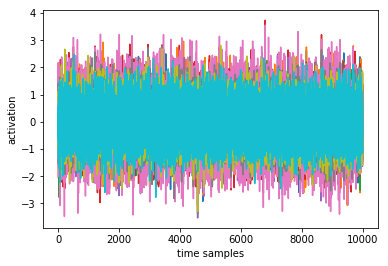

In [2]:
# simulate some data
data = se.simulate_bo(n_samples=10000, n_elecs=10).get_data()

# plot it
plt.plot(data)
plt.xlabel('time samples')
plt.ylabel('activation')
plt.show()

We'll also simulate some electrode locations

In [3]:
locs = se.simulate_locations()
print(locs)

    x   y   z
0 -13  16  74
1  14 -17 -47
2   2  -5  63
3  19 -43  24
4  13  64  -7
5  34 -45 -36
6 -10 -48   1
7 -20  -5  31
8 -76  71  29
9 -80 -44 -56


# Creating a brain object

To construct a new brain objects, simply pass the data and locations to the `Brain` class like this:

In [4]:
bo = se.Brain(data=data, locs=locs, sample_rate=1000)

To view a summary of the contents of the brain object, you can call the `info` function:

In [5]:
bo.info()

Number of electrodes: 10
Recording time in seconds: 10
Number of sessions: 1
Date created: Thu Jan 18 13:57:31 2018
Meta data: None


Optionally, you can pass a `sessions` parameter, which is a numpy array the length of your data with a unique identifier for each session.  For example:

In [6]:
sessions = np.array([1]*(data.shape[0]/2)+[2]*(data.shape[0]/2))
bo = se.Brain(data=data, locs=locs, sample_rate=1000, sessions=sessions)
bo.info()

Number of electrodes: 10
Recording time in seconds: 10
Number of sessions: 2
Date created: Thu Jan 18 13:57:31 2018
Meta data: None


You can also pass add custom meta data to the brain object to help keep track of its contents. `meta` is a dictionary comprised of whatever you want:

In [7]:
meta = {
    'subjectID' : '123',
    'Investigator' : 'Andy',
    'Hospital' : 'DHMC'
}
bo = se.Brain(data=data, locs=locs, sample_rate=1000, sessions=sessions, meta=meta)
bo.info()

Number of electrodes: 10
Recording time in seconds: 10
Number of sessions: 2
Date created: Thu Jan 18 13:57:31 2018
Meta data: {'Hospital': 'DHMC', 'subjectID': '123', 'Investigator': 'Andy'}


# The structure of a brain object

Inside the brain object, the iEEG data is stored as a Pandas DataFrame that can be accessed directly:

In [8]:
bo.data.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.439924,-2.045115,-1.165919,-0.356696,-0.639120,-1.506737,-0.697546,-0.612343,-1.016369,-1.424138
1,-1.169516,-1.362141,-1.080469,1.237307,0.936130,0.257384,1.865483,0.937683,0.956006,0.103873
2,0.674429,0.977441,0.528712,-0.799020,-0.012391,0.230524,-1.356285,-0.448797,0.120292,0.573936
3,-0.768318,-1.277697,-0.519569,1.542163,0.949974,-0.316717,2.178681,0.866687,0.417078,-0.039715
4,0.073736,0.280760,-0.305206,-0.765795,-0.446795,-0.180964,-0.463573,-0.600229,0.109651,-0.658903


or returned as a numpy array using the `get_data` method:

In [9]:
bo.get_data()

array([[-1.43992367, -2.04511541, -1.16591858, ..., -0.61234322,
        -1.01636863, -1.42413798],
       [-1.16951571, -1.36214059, -1.08046869, ...,  0.93768286,
         0.95600615,  0.1038726 ],
       [ 0.67442934,  0.97744089,  0.52871243, ..., -0.4487973 ,
         0.12029163,  0.57393561],
       ..., 
       [-0.66540165, -0.51043433, -1.17075154, ..., -1.41365213,
        -1.26559824, -1.13399876],
       [-0.47817396, -0.45709348, -0.52159897, ...,  0.11858977,
        -0.23101758, -0.46436823],
       [-0.50043258, -0.52275946, -0.58739873, ...,  0.15657198,
        -0.75872181,  0.021521  ]])

Similarly, the electrode locations are stored as a Pandas DataFrame, and can be retrieved as a numpy array using the `get_locs` method:

In [10]:
bo.locs.head()

,x,y,z
0,-13,16,74
1,14,-17,-47
2,2,-5,63
3,19,-43,24
4,13,64,-7


In [11]:
bo.get_locs()

array([[-13,  16,  74],
       [ 14, -17, -47],
       [  2,  -5,  63],
       [ 19, -43,  24],
       [ 13,  64,  -7],
       [ 34, -45, -36],
       [-10, -48,   1],
       [-20,  -5,  31],
       [-76,  71,  29],
       [-80, -44, -56]])

The other pieces of the brain object are listed below:

In [12]:
# array of session identifiers for each timepoint
sessions = bo.sessions

# number of sessions
n_sessions = bo.n_sessions

# sample rate
sample_rate = bo.sample_rate

# number of electrodes
n_elecs = bo.n_elecs

# length of recording in seconds
n_seconds = bo.n_secs

# the date and time that the bo was created
date_created = bo.date_created

# kurtosis of each electrode
kurtosis = bo.kurtosis

# meta data
meta = bo.meta

# Brain object methods

There are a few other useful methods on a brain object

## `bo.info()`

This method will give you a summary of the brain object:

In [13]:
bo.info()

Number of electrodes: 10
Recording time in seconds: 10
Number of sessions: 2
Date created: Thu Jan 18 13:57:31 2018
Meta data: {'Hospital': 'DHMC', 'subjectID': '123', 'Investigator': 'Andy'}


## `bo.get_data()`

This method will return a numpy array of the data:

In [14]:
data_array = bo.get_data()

## `bo.get_locs()`

This method will return a numpy array of the electrode locations:

In [15]:
locs = bo.get_locs()

## `bo.save(fname='something')`

This method will save the brain object to the specified file location:

In [16]:
#bo.save(fname='brain_object')

## `bo.to_nii()`

This method converts the brain object into a `nibabel` nifti image.  If `filepath` is specified, the nifti file will be saved. You can also specify a nifti template with the `template` argument.

In [17]:
nii = bo.to_nii()
print(type(nii))

# save the file
# nii = bo.to_nii(filepath='/path/to/file/brain')

# specify a template
# nii = bo.to_nii(template='/path/to/nifti/file.nii')

<class 'nibabel.nifti1.Nifti1Image'>
